# **Big Data Analysis- Proyecto Big-Data**

OBJETIVO GENERAL
Integrar el análisis de datos de la cadena de suministro (supply chain) con técnicas de machine learning para desarrollar un modelo de clasificación que prediga el riesgo de entrega tardía. Este modelo considerará diversos factores operacionales, logísticos y de producto (distancia, peso, transportista, ciudad destino, tipo de producto, tiempo de procesamiento) para identificar anticipadamente qué envíos presentan mayor probabilidad de retraso, permitiendo tomar decisiones proactivas que reduzcan las incidencias y mejoren la satisfacción del cliente.

OBJETIVO DE NEGOCIO
Reducir significativamente el número de entregas tardías mediante predicción temprana del riesgo, lo cual permitirá:

Disminuir quejas y reclamos
Mejorar la reputación de la marca
Incrementar la retención de clientes
Optimizar recursos logísticos
Tomar decisiones informadas sobre rutas, transportistas y priorización


OBJETIVOS ESPECÍFICOS DEL NOTEBOOK
1. Análisis Exploratorio Enfocado en Supply Chain
Desarrollar un análisis exploratorio de datos (EDA) utilizando Pandas-Profiling y otras librerías de Python, con enfoque específico en variables de la cadena de suministro:

Identificar y analizar factores clave: distancia de envío, peso del paquete, tipo de transportista, ciudad de origen/destino, categoría de producto, tiempos de procesamiento
Examinar la distribución de entregas tardías vs puntuales
Detectar patrones y relaciones entre variables del supply chain
Documentar conclusiones relevantes para el negocio

2. Limpieza y Preparación de Datos
Ejecutar procesos de limpieza basados en los hallazgos del EDA:

Gestión de valores faltantes y registros duplicados
Identificación y tratamiento de valores atípicos
Transformación de variables categóricas (codificación)
Estandarización de escalas cuando sea necesario
Evaluación del balance de clases (entregas tardías vs puntuales)

3. Análisis Multivariable y Visualización de Factores
Realizar análisis de múltiples variables utilizando librerías de visualización (Matplotlib, Seaborn, Plotly):

Correlaciones entre factores del supply chain y entregas tardías
Comparación de tasas de retraso por transportista, ciudad, categoría de producto
Análisis de impacto de distancia y peso en tiempos de entrega
Gráficos interpretativos: mapas de calor, diagramas de caja, gráficos de dispersión
Identificación visual de factores de mayor riesgo

4. Validación Estadística de Factores de Riesgo
Plantear y evaluar hipótesis sobre los factores que causan entregas tardías mediante estadística inferencial:
Hipótesis ejemplo:

H0: La distancia del envío no afecta la probabilidad de entrega tardía
H1: Mayor distancia incrementa el riesgo de retraso

Otras hipótesis a explorar:

Diferencias entre transportistas
Impacto del peso del producto
Influencia de la ciudad destino
Efecto del tiempo de procesamiento

Métodos estadísticos: Chi-cuadrado, pruebas t, ANOVA (α = 0.05)
5. Desarrollo de Modelos Predictivos de Clasificación
Construir y comparar diferentes algoritmos de machine learning que permitan predecir el riesgo de entrega tardía basándose en los factores identificados:

Modelos candidatos: Regresión Logística, Random Forest, XGBoost, Gradient Boosting
Métricas de evaluación: Accuracy, Precision, Recall, F1-Score, Curva ROC-AUC
Interpretabilidad: Identificar qué variables tienen mayor peso en la predicción
Selección final: Elegir el modelo con mejor balance entre precisión y aplicabilidad operativa


ENTREGABLE FINAL
Un modelo predictivo operacional que:

Identifique en tiempo real qué envíos tienen alto riesgo de llegar tarde
Cuantifique el riesgo (probabilidad de retraso)
Explique los factores que contribuyen al riesgo en cada caso
Permita acciones preventivas: reasignación de transportista, ajuste de rutas, comunicación proactiva al cliente, priorización de procesamiento

Impacto esperado: Reducción medible de entregas tardías, disminución de quejas, mejor planificación del supply chain y mayor satisfacción del cliente.
# Dataset
El conjunto de datos contiene información de la cadena de suministro para un comercio electrónico. Los datos describen procesos de aprovisionamiento, producción, ventas y distribución comercial. También permite la correlación de Datos Estructurados con Datos No Estructurados para la generación de conocimiento. El dataset  ha sido tomado del repositorio kaggle y se encuentra disponible a través del siguiente enlace: https://www.kaggle.com/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis



In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling as pp # exploratory data analysis EDA
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns #data visualisation
import plotly.express as px #data visualisation
import plotly.graph_objects as go
from scipy.stats import chi2_contingency, norm # Calculo de chi2


C:\Users\Camila\AppData\Local\Temp\ipykernel_20924\1931575038.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp # exploratory data analysis EDA


In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency, norm
import os



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install -q plotly



In [3]:
!pip install -q ydata-profiling


Leer el dataset y cargar datos 

In [1]:
import pandas as pd

data = pd.read_csv(r"C:\Users\Camila\Downloads\DataCoSupplyChainDataset\DataCoSupplyChainDataset.csv", encoding="latin-1")



Explorar los primeros 5 registros del dataset

In [3]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


Crear reporte de Pandas profile

In [6]:
import pandas_profiling as pp


profile = pp.ProfileReport(df, title = "EDA")

C:\Users\Camila\AppData\Local\Temp\ipykernel_13880\1358262161.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [ ]:
# profile.to_notebook_iframe() # Genera el reporte directamente en el notebook.

In [16]:
pip install "numpy<2.0" ydata-profiling


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Guardar el reporte como un archivo con extensión html

In [7]:

!pip install "numpy<2.0"


Defaulting to user installation because normal site-packages is not writeable


In [14]:
!pip install ipywidgets


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ---------------------------------------- 914.9/914.9 kB 6.0 MB/s  0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 12.4 MB/s  0:00:00

   ---------------------------------------- 0/3 [widgetsnbextension]
   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -

In [3]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html("reporte_sweetviz.html")


                                             |          | [  0%]   00:00 -> (? left)

Report reporte_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Datos nulos: Se encontraron datos nulos en 3 columnas: 

Existen un total de 53 features

Variables numéricas: Existen 23 variables que han sido identificadas como numéricas.

Ha clasifica 12 variables como cadenas de texto y 18 varaibles como categóricas

**Datos nulos**
Se encontraron datos nulos en tres columnas, Order Zipcode ( 86% valores nulos, es decir un total de 155679 registros), Product description (100% de valores nulos, es decir un total de 180519 registros) y customer zipcode (<0.1% es decir un total de 3 registros), en conjunto estas celdas vacias corresponden al 3.5% del total del dataset


**Conclusiones EDA**
No incluir en el análisis las columnas order zipcode (casi vacia), product description (totalmente vacias), customer email (constante sin información), Customer password (Constante sin información), adicionalmente podemos reemplazar los valores nulos de la columna customer zipcode. 
Finalmente existen algunas  columnas que pueden obviarse a la hora de hacer el análisis ya que no aportan información relevante para el objeto del estudio, dichas columnas son: Product Status,Customer Street,Customer Fname,Customer Lname,Latitude,Longitude,Product Image.

# Data Cleaning

In [4]:
# shape and data types of the data
print(data.shape)
print(data.dtypes)

    # se puede revisar la clasificación de pandas profiling contra el tipo de dato 

(180519, 53)
Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Mar

Eliminaremos las columnas innecesarias

In [5]:
data=data.drop(['Order Zipcode','Product Description', 'Customer Email','Customer Password','Product Status','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Image',],axis=1)
data.shape

(180519, 42)

Los valores nulos de zipcode seran reemplazados por el valor mas común

In [5]:
column_index=data.columns.get_loc("Customer Zipcode")
# Get the index of the column "Customer Zipcode"
data['Customer Zipcode']=data['Customer Zipcode'].fillna(data.mode().iloc[column_index])
#Filling NaN columns with most common value

C:\Users\Camila\AppData\Local\Temp\ipykernel_22368\2428187281.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Customer Zipcode']=data['Customer Zipcode'].fillna(data.mode().iloc[column_index])


# Seleccionar solo columnas numéricas

In [6]:
data_numerica = data.select_dtypes(include='number')

# Descriptive analysis and visualisation

Se elabora una matriz de correlación

In [7]:
import numpy as np
import pandas as pd

# Función Correlation Ratio (Eta)
def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)

    grand_mean = np.mean(values)
    numerator = sum(
        len(values[categories == cat]) *
        (np.mean(values[categories == cat]) - grand_mean) ** 2
        for cat in np.unique(categories)
    )
    denominator = sum((values - grand_mean) ** 2)

    return np.sqrt(numerator / denominator) if denominator != 0 else np.nan


# -------------------------------
# Cálculo de Eta para todas las variables numéricas
# -------------------------------

eta_results = {}

for col in data_numerica:
    eta_results[col] = correlation_ratio(data["Delivery Status"], data[col])


# -------------------------------
# Resultados en DataFrame ordenado
# -------------------------------

eta_df = (
    pd.DataFrame.from_dict(eta_results, orient="index", columns=["Eta"])
      .sort_values(by="Eta", ascending=False)
)

print("Correlation Ratio (Eta) entre 'Delivery Status' y variables numéricas:\n")
print(eta_df)


Correlation Ratio (Eta) entre 'Delivery Status' y variables numéricas:

                                    Eta
Late_delivery_risk             1.000000
Days for shipment (scheduled)  0.448300
Days for shipping (real)       0.422565
Sales per customer             0.005292
Order Item Total               0.005292
Benefit per order              0.005199
Order Profit Per Order         0.005199
Sales                          0.004937
Customer Id                    0.004826
Order Customer Id              0.004826
Order Item Id                  0.004751
Order Id                       0.004698
Latitude                       0.004227
Order Item Discount Rate       0.003506
Longitude                      0.003445
Order Item Profit Ratio        0.003439
Product Price                  0.003103
Order Item Product Price       0.003103
Order Item Quantity            0.002760
Category Id                    0.002255
Product Category Id            0.002255
Product Card Id                0.002140
Order It

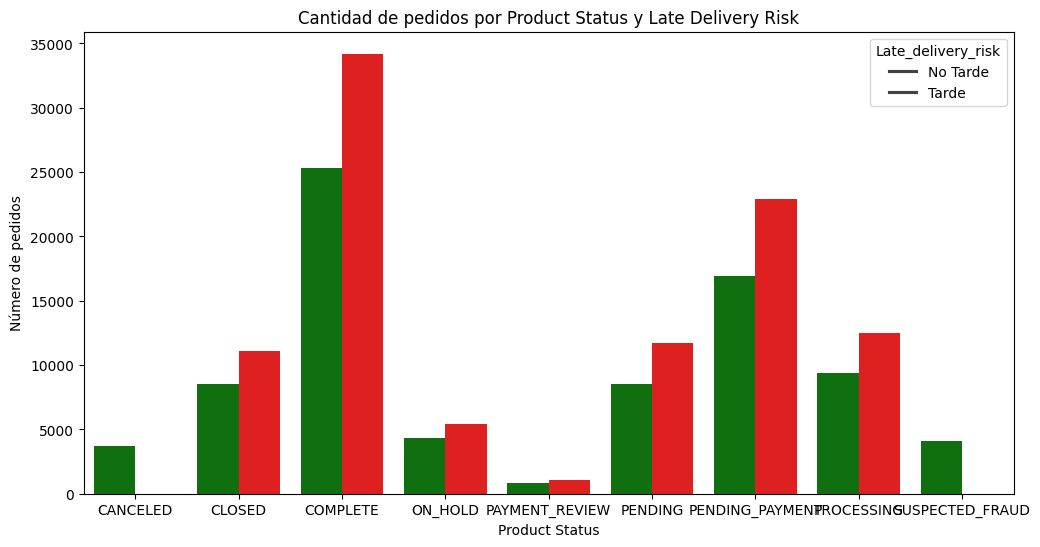

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Agrupar por Order Status y Late_delivery_risk
status_counts = data.groupby(['Order Status', 'Late_delivery_risk']).size().reset_index(name='count')

# Gráfico de barras apiladas usando seaborn
plt.figure(figsize=(12,6))
sns.barplot(
    x='Order Status',
    y='count',
    hue='Late_delivery_risk',
    data=status_counts,
    palette=['green','red']
)
plt.title('Cantidad de pedidos por Product Status y Late Delivery Risk')
plt.xlabel('Product Status')
plt.ylabel('Número de pedidos')
plt.legend(title='Late_delivery_risk', labels=['No Tarde','Tarde'])
plt.show()


<Axes: >

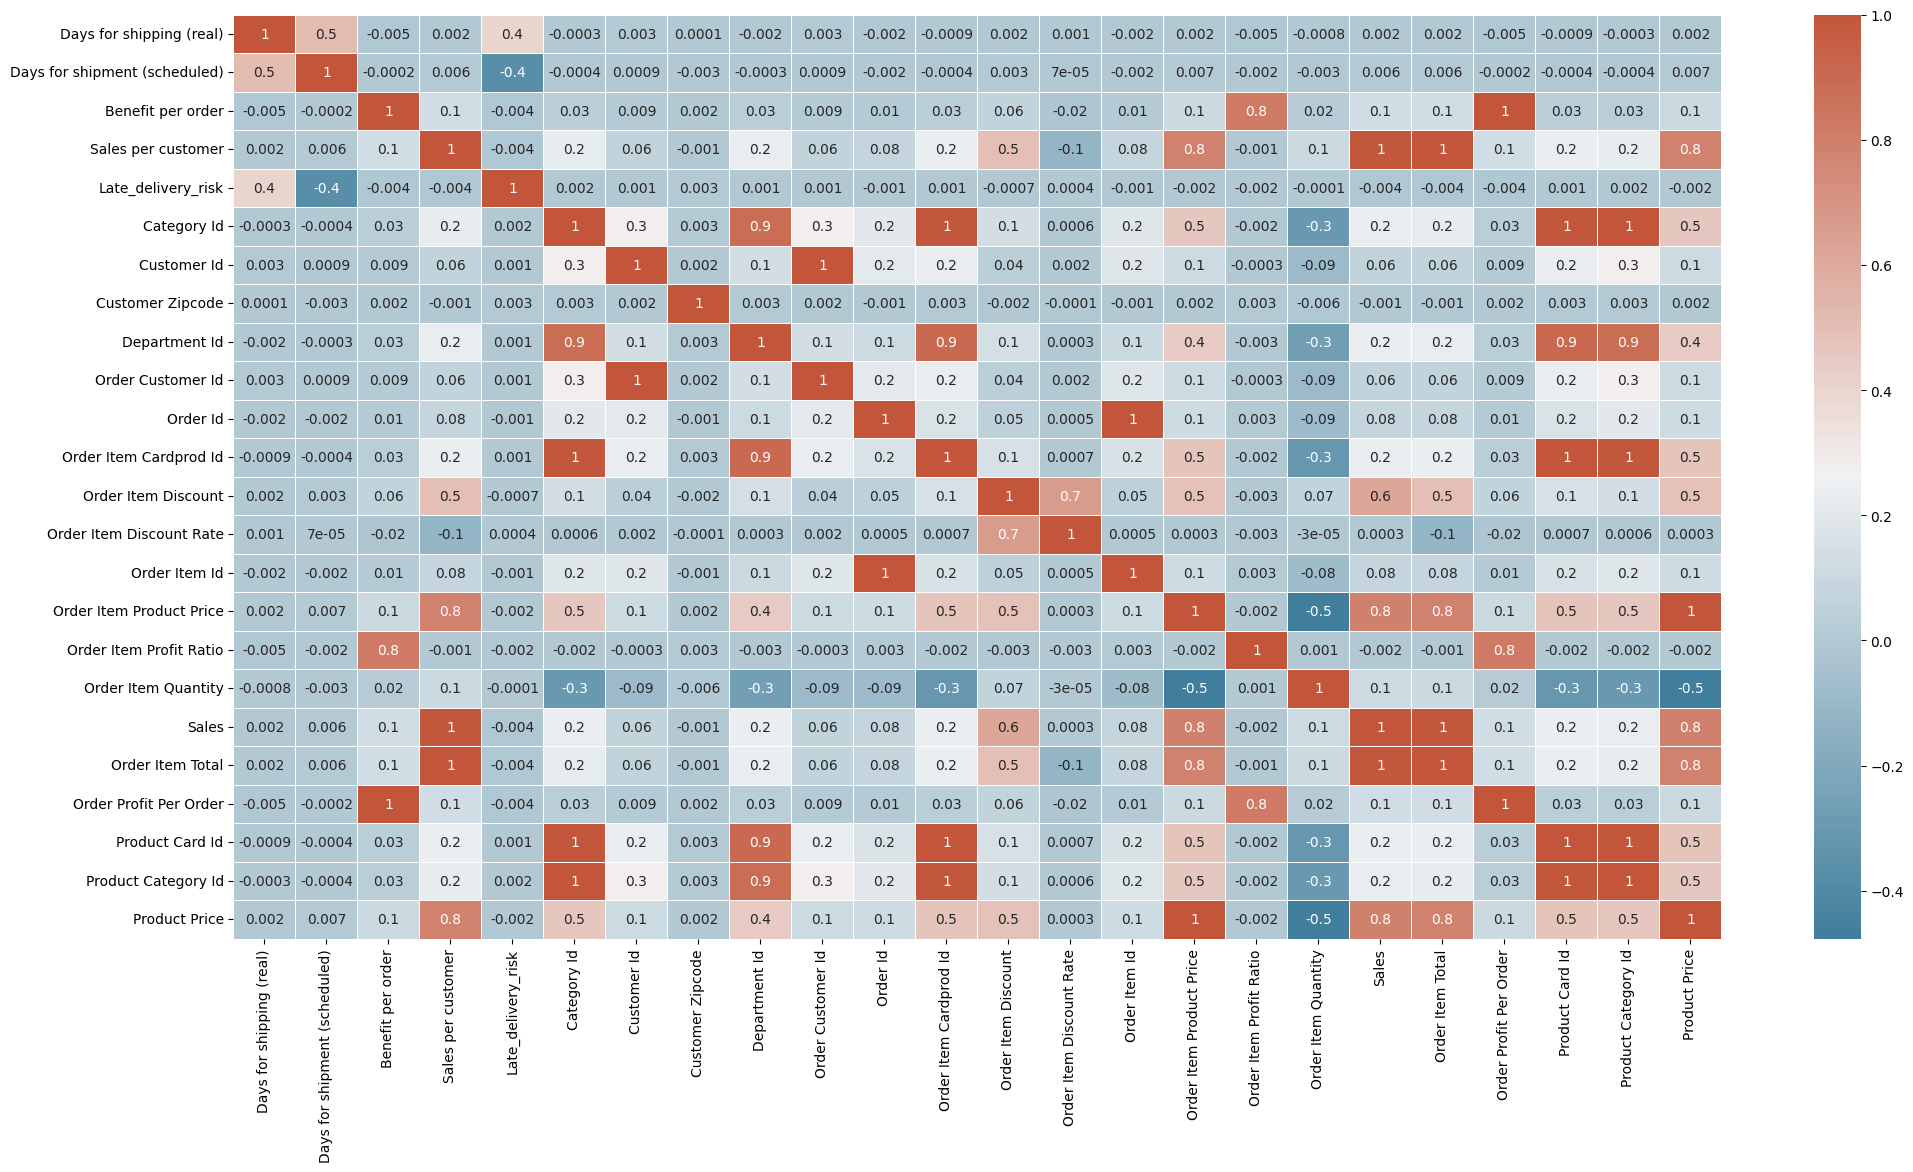

In [13]:
import plotly.express as px #data visualisation
import matplotlib.pyplot as plt
import seaborn as sns  # also needed for sns.heatmap


fig, ax = plt.subplots(figsize=(24,12))         # figsize
sns.heatmap(data_numerica.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= sns.diverging_palette(230, 20, as_cmap=True)) # Heatmap for correlation matrix


Se elaboran las tablas de frecuencia relativa para variables categoricas

In [20]:
count=data['Delivery Status'].value_counts()  #change categoric variable
print(count / len(data))

Delivery Status
Late delivery        0.548291
Advance shipping     0.230402
Shipping on time     0.178352
Shipping canceled    0.042954
Name: count, dtype: float64


¿Cual es la categoria que más se entrega de forma tardia?

In [11]:
import plotly.express as px

#Filtering columns with late delivery status
late_delivery = df[(df['Delivery Status'] == 'Late delivery')]
#Top 10 products with most late deliveries
fig = px.bar(late_delivery['Category Name'].value_counts().nlargest(10), 
             title="Top 10 products with most late deliveries",
            labels={'value':'Number of late deliveries','index':'Category'})
fig.show()

Si solo cuentas la cantidad absoluta de entregas tardías por categoría (value_counts()), categorías con muchos pedidos aparecerán más grandes, aunque su proporción de retrasos sea baja. Esto puede dar una visión distorsionada del desempeño real, porque no considera el tamaño relativo de cada categoría.

In [9]:
late_count = late_delivery['Category Name'].value_counts()   # Entregas tardías por categoría
total_count = df['Category Name'].value_counts()           # Total de entregas por categoría
proportional_count = late_count / total_count * 100          # Porcentaje de retrasos


In [13]:
#Calculating proproptional late deliveries
late_count=late_delivery['Category Name'].value_counts()
total_count=df['Category Name'].value_counts()
proportional_count=late_count/total_count*100
fig = px.bar(proportional_count.nlargest(15), 
             title="Top 10 products with highest rate of late delivery",
            labels={'value':'Percentage of late deliveries','index':'Category'})
fig.show()


Con esta grafica se puede deducir que no existe relación entre la categoria del producto y la entrega tardia, y que todas las categorias tienen aproximadamente un 50 % de entregas tardias

¿Cual es el numero de entregas tardias de acuerdo con el tipo de envío y la región?
Para esta grafica se realizan dos versiones usando dos librerias diferentes de python con el fin de comparar sus resultados, en la primera se crea una grafica estatica usando matplotlib mientas que la segunda es una grafica dinamica creada usando plotly

In [7]:
import plotly.graph_objects as go

# Filtrar solo entregas tardías
late = data[data['Delivery Status'] == 'Late delivery']

# Agrupar por Región y Tipo de Envío
grouped = (
    late
    .groupby(['Order Region', 'Shipping Mode'])
    .size()
    .unstack(fill_value=0)
)

# ===============================
# ORDER BY DESC (variable de orden)
# ===============================
order_desc = grouped.sum(axis=1).sort_values(ascending=False).index

# Reordenar el DataFrame
grouped = grouped.loc[order_desc]

# ===============================
# Gráfica
# ===============================
fig = go.Figure()

for mode in grouped.columns:
    fig.add_trace(go.Bar(
        x=grouped.index,
        y=grouped[mode],
        name=mode
    ))

fig.update_layout(
    title='Late Deliveries by Shipping Method Across Regions',
    xaxis_title='Order Region',
    yaxis_title='Number of Late Shipments',
    barmode='group'
)

fig.show()


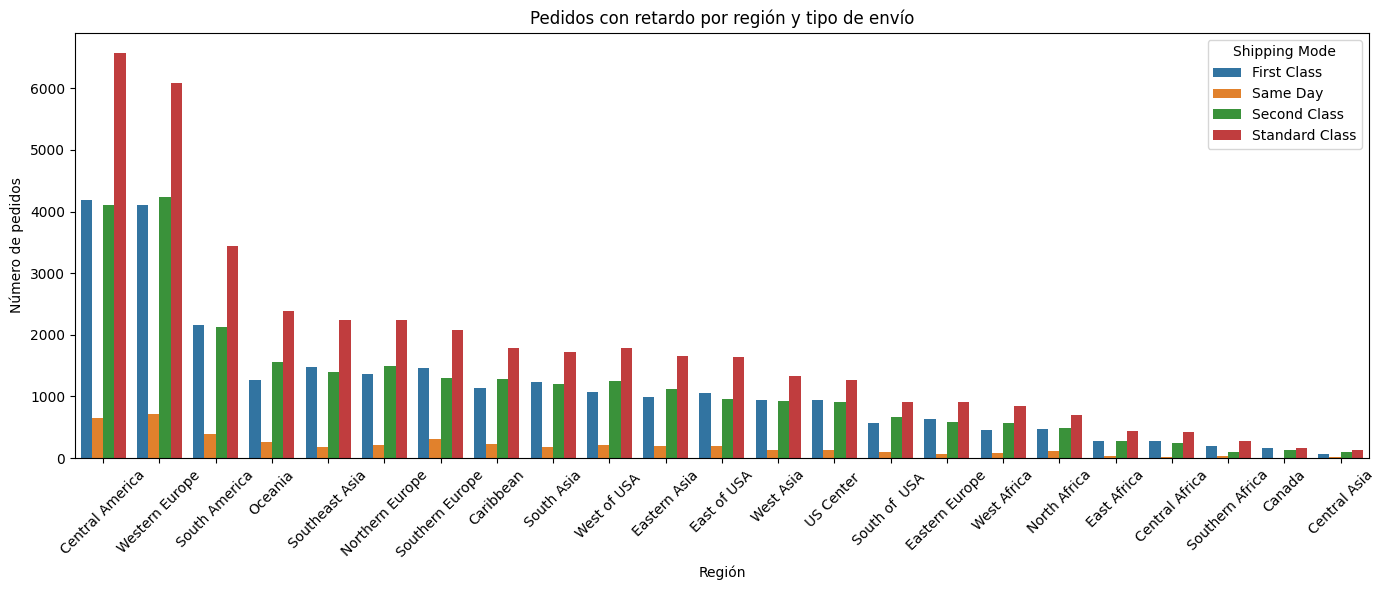

In [ ]:
# =========================
# IMPORTS
# =========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# FILTRAR PEDIDOS CON RETRASO
# =========================
late_data = df[df["Delivery Status"] == "Late delivery"]

# =========================
# CONTAR POR REGIÓN Y TIPO DE ENVÍO
# =========================
late_counts = (
    late_data
    .groupby(["Order Region", "Shipping Mode"])
    .size()
    .reset_index(name="count")
)

# =========================
# ORDENAR REGIONES POR TOTAL (DESC)
# =========================
region_order = (
    late_counts
    .groupby("Order Region")["count"]
    .sum()
    .sort_values(ascending=False)
    .index
)

# =========================
# GRÁFICA DE BARRAS
# =========================
plt.figure(figsize=(14, 6))

sns.barplot(
    data=late_counts,
    x="Order Region",
    y="count",
    hue="Shipping Mode",
    order=region_order
)

plt.title("Pedidos con retardo por región y tipo de envío")
plt.xlabel("Región")
plt.ylabel("Número de pedidos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Estadistica inferencial**

Prueba de hipotesis

*Hipotesis Nula H0*:

1. La region a la cual se realiza el envío no influye en la entrega tardia

2. El tipo de envío no influye en la entrega tardia

3. La categoria del producto no influye e la entrega tardia

*Hipotesis Alternativa Ha*: 

1. La region a la cual se realiza el envío  influye en la entrega tardia

2. El tipo de envío  influye en la entrega tardia

3. La categoria del producto  influye e la entrega tardia

In [24]:

def calcular_chi2(dependiente,independientes):
    for var in independientes:
        primary_location_cross = pd.crosstab(data[dependiente], data[var])
        g, p, dof, expctd = chi2_contingency(primary_location_cross)
        print("p-value de Chi-square test para " + dependiente + " vs " + var + " = " , p)


columnas = ['Order Region','Shipping Mode','Category Name','Type','Customer City','Customer Segment']

calcular_chi2('Delivery Status', columnas)



p-value de Chi-square test para Delivery Status vs Order Region =  3.912852929033907e-23
p-value de Chi-square test para Delivery Status vs Shipping Mode =  0.0
p-value de Chi-square test para Delivery Status vs Category Name =  0.6712499177801518
p-value de Chi-square test para Delivery Status vs Type =  0.0
p-value de Chi-square test para Delivery Status vs Customer City =  0.0
p-value de Chi-square test para Delivery Status vs Customer Segment =  0.03760953260714379


Basados en la anterior prueba de hipotesis en la cual se utiliza la distribución Chi2 y se calcularon los niveles de significancia entre
las distintas variables categoricas se puede concluir lo siguiente:

1. Rechazar la hipotesis nula 1
2. Rechazar la hipotesis nula 2
3. Aceptar la hipotesis nula 3

# Algoritmos de CLASIFICACIÓN

*El primer algoritmo a utilizar es regresion logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [ ]:
# Select the columns needed for the model
prediction_data=data[['Order Region','Shipping Mode','Delivery Status']]
prediction_data.columns=['Order_Region','Shipping_Mode','Delivery_Status'] #al incluir la columna Type el modelo baja su precision, al incluir Customer City el modelo no converge
prediction_data=prediction_data[prediction_data.Delivery_Status!='Shipping canceled']
prediction_data=prediction_data[prediction_data.Delivery_Status!='Advance shipping']
prediction_data.head()

,Order_Region,Shipping_Mode,Delivery_Status
1,South Asia,Standard Class,Late delivery
2,South Asia,Standard Class,Shipping on time
6,Eastern Asia,First Class,Late delivery
7,Eastern Asia,First Class,Late delivery
8,Eastern Asia,Second Class,Late delivery


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# ------------------------------------------------
# 1. Selección de variables categóricas válidas
# ------------------------------------------------
prediction_data = data[
    ['Order Region', 'Shipping Mode', 'Customer City', 'Late_delivery_risk']
]

# ------------------------------------------------
# 2. One-Hot Encoding para variables categóricas
# ------------------------------------------------
prediction_data = pd.get_dummies(prediction_data, drop_first=True)

# ------------------------------------------------
# 3. Definir X e y
# ------------------------------------------------
X = prediction_data.drop('Late_delivery_risk', axis=1)
y = prediction_data['Late_delivery_risk']

# ------------------------------------------------
# 4. Train / Test Split
# ------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ------------------------------------------------
# 5. Entrenar Logistic Regression
# ------------------------------------------------
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# ------------------------------------------------
# 6. Evaluación
# ------------------------------------------------
y_pred = model.predict(X_test)
print("Accuracy:", model.score(X_test, y_test))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.6975404387325504

Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.87      0.72     16308
           1       0.84      0.55      0.67     19796

    accuracy                           0.70     36104
   macro avg       0.73      0.71      0.70     36104
weighted avg       0.74      0.70      0.69     36104



In [ ]:
# Feature enginering, one hot encoding
#usar one hot encoding cuando la variable categorica es NOMINAL
prediction_data=pd.get_dummies(prediction_data, drop_first=True)
prediction_data.head()

,Order_Region_Caribbean,Order_Region_Central Africa,Order_Region_Central America,Order_Region_Central Asia,Order_Region_East Africa,Order_Region_East of USA,Order_Region_Eastern Asia,Order_Region_Eastern Europe,Order_Region_North Africa,Order_Region_Northern Europe,...,Order_Region_Southern Europe,Order_Region_US Center,Order_Region_West Africa,Order_Region_West Asia,Order_Region_West of USA,Order_Region_Western Europe,Shipping_Mode_Same Day,Shipping_Mode_Second Class,Shipping_Mode_Standard Class,Delivery_Status_Shipping on time
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Test train split
X_train, X_test, Y_train, Y_test=train_test_split(prediction_data.drop('Delivery_Status_Shipping on time',axis=1),prediction_data['Delivery_Status_Shipping on time'])

In [ ]:
#train the model
LogReg=LogisticRegression()
LogReg.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
#score the model
LogReg.score(X_test, Y_test)

0.7615112520583034

In [ ]:
Y_pred=LogReg.predict(X_test)
print (classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86     24856
           1       0.53      0.14      0.22      7938

    accuracy                           0.76     32794
   macro avg       0.65      0.55      0.54     32794
weighted avg       0.72      0.76      0.70     32794



El modelo creado usando regresion logistica tiene un 75.59% de exactitud

*El segundo algoritmo a utilizar es Random Forest 

In [ ]:
#Import dependencies and train the model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
#score the model
classifier.score(X_test,Y_test)

0.7620601329511496

In [ ]:
Y_pred_RF=classifier.predict(X_test)
print (classification_report(Y_test,Y_pred_RF))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86     24856
           1       0.56      0.08      0.14      7938

    accuracy                           0.76     32794
   macro avg       0.66      0.53      0.50     32794
weighted avg       0.72      0.76      0.69     32794



El modelo creado usando el algoritmo de Random Forest tiene un 75.76% de exactitud

**Referencias**
https://www.kaggle.com/skloveyyp/comparison-of-classification-regression-rnn

https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d

https://towardsdatascience.com/log-book-guide-to-hypothesis-testing-802b1980d0b8

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score

# ------------------------------------------------
# 1. Selección de variables
# ------------------------------------------------
categorical_features = ['Order Region', 'Shipping Mode', 'Order Status'] 
numeric_features = ['Days for shipment (scheduled)']
target = 'Late_delivery_risk'

# ------------------------------------------------
# 2. One-Hot Encoding para categóricas
# ------------------------------------------------
X_cat = pd.get_dummies(data[categorical_features], drop_first=True)
X_num = data[numeric_features]

# opcional: escalar numéricas
scaler = MinMaxScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=numeric_features)

# combinar todo
X = pd.concat([X_cat, X_num_scaled], axis=1)
y = data[target]

# ------------------------------------------------
# 3. Train / Test Split
# ------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ------------------------------------------------
# 4. Entrenar Random Forest
# ------------------------------------------------
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=50,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# ------------------------------------------------
# 5. Evaluación
# ------------------------------------------------
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ------------------------------------------------
# 6. Importancia de features
# ------------------------------------------------
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print("\nTop 10 Features más importantes:")
print(importances.head(10))



Accuracy: 0.7055450919565699

Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.90      0.73     16308
           1       0.87      0.55      0.67     19796

    accuracy                           0.71     36104
   macro avg       0.74      0.72      0.70     36104
weighted avg       0.76      0.71      0.70     36104


Top 10 Features más importantes:
Days for shipment (scheduled)    0.403194
Shipping Mode_Standard Class     0.352308
Order Status_SUSPECTED_FRAUD     0.090150
Shipping Mode_Second Class       0.078370
Shipping Mode_Same Day           0.041899
Order Status_COMPLETE            0.007367
Order Status_PENDING_PAYMENT     0.007117
Order Status_CLOSED              0.003917
Order Status_PENDING             0.003564
Order Status_PROCESSING          0.002806
dtype: float64


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# ------------------------------------------------
# 1. Selección de variables
# ------------------------------------------------
categorical_features = ['Order Region', 'Shipping Mode', 'Order Status', 'Type'] 
numeric_features = ['Days for shipment (scheduled)']
target = 'Late_delivery_risk'

# ------------------------------------------------
# 2. One-Hot Encoding para categóricas
# ------------------------------------------------
X_cat = pd.get_dummies(data[categorical_features], drop_first=True)
X_num = data[numeric_features]

# Escalar variables numéricas
scaler = MinMaxScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=numeric_features)

# Combinar todo
X = pd.concat([X_cat, X_num_scaled], axis=1)
y = data[target]

# ------------------------------------------------
# 3. Train / Test Split
# ------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ------------------------------------------------
# 4. Entrenar Regresión Logística
# ------------------------------------------------
log_model = LogisticRegression(
    class_weight='balanced',
    solver='liblinear',  # bueno para datasets pequeños/medianos
    random_state=42
)
log_model.fit(X_train, y_train)

# ------------------------------------------------
# 5. Evaluación
# ------------------------------------------------
y_pred = log_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ------------------------------------------------
# 6. Importancia de features (coeficientes)
# ------------------------------------------------
importances = pd.Series(log_model.coef_[0], index=X.columns)
importances = importances.sort_values(key=abs, ascending=False)
print("\nTop 10 Features más importantes:")
print(importances.head(10))


Accuracy: 0.7117216928872148

Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.92      0.74     16308
           1       0.89      0.54      0.67     19796

    accuracy                           0.71     36104
   macro avg       0.76      0.73      0.71     36104
weighted avg       0.77      0.71      0.70     36104


Top 10 Features más importantes:
Order Status_PENDING             9.330915
Order Status_PROCESSING          9.296595
Shipping Mode_Same Day          -6.965195
Type_TRANSFER                   -5.671809
Shipping Mode_Standard Class    -4.939962
Shipping Mode_Second Class      -4.331642
Order Status_CLOSED              3.590824
Type_PAYMENT                     2.417727
Type_DEBIT                       2.400195
Days for shipment (scheduled)   -2.362349
dtype: float64


C:\Users\Camila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [16:31:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7133281630844228

Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.90      0.74     16308
           1       0.87      0.56      0.68     19796

    accuracy                           0.71     36104
   macro avg       0.75      0.73      0.71     36104
weighted avg       0.76      0.71      0.71     36104


Top 10 Features más importantes:
Shipping Mode_Standard Class    0.373338
Order Status_SUSPECTED_FRAUD    0.272251
Shipping Mode_Same Day          0.090743
Order Status_PROCESSING         0.081245
Shipping Mode_Second Class      0.053434
Order Status_PENDING            0.033263
Type_TRANSFER                   0.028655
Order Region_East of USA        0.004957
Order Region_Eastern Europe     0.004451
Order Region_Central America    0.003372
dtype: float32


C:\Users\Camila\AppData\Local\Temp\ipykernel_11540\3346848336.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.head(10).values, y=importances.head(10).index, palette="viridis")


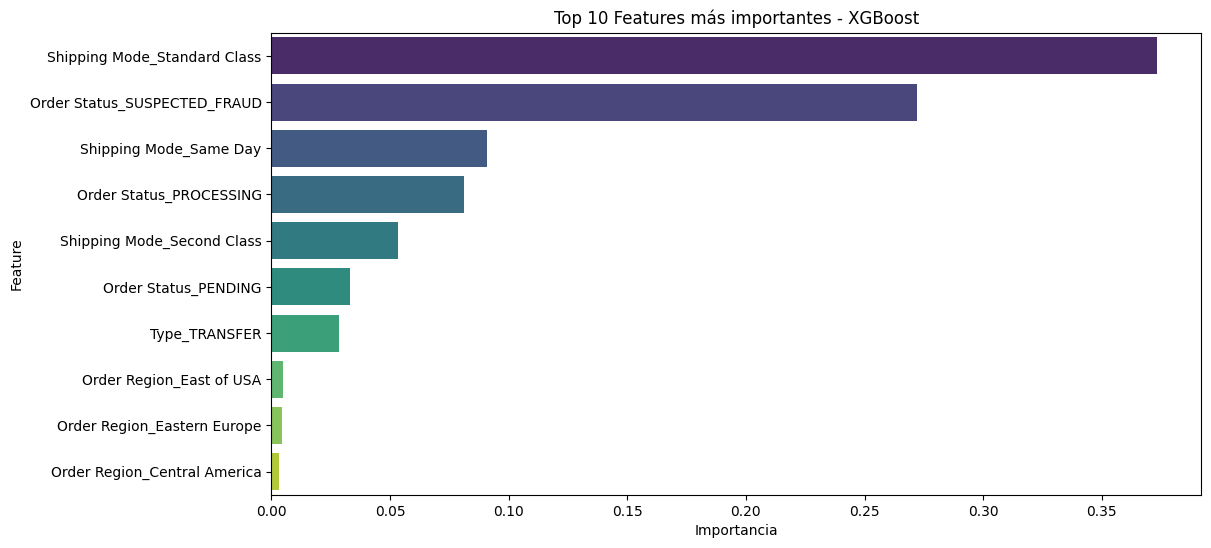

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------
# 1. Selección de variables
# ------------------------------------------------
categorical_features = ['Order Region', 'Shipping Mode', 'Order Status', 'Type'] 
numeric_features = ['Days for shipment (scheduled)']
target = 'Late_delivery_risk'

# ------------------------------------------------
# 2. One-Hot Encoding para categóricas
# ------------------------------------------------
X_cat = pd.get_dummies(data[categorical_features], drop_first=True)
X_num = data[numeric_features]



# Combinar todo
X = pd.concat([X_cat, X_num], axis=1)
y = data[target]

# ------------------------------------------------
# 3. Train / Test Split
# ------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ------------------------------------------------
# 4. Entrenar XGBoost
# ------------------------------------------------
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1],  # balance de clases
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# ------------------------------------------------
# 5. Evaluación
# ------------------------------------------------
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ------------------------------------------------
# 6. Importancia de features
# ------------------------------------------------
importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print("\nTop 10 Features más importantes:")
print(importances.head(10))

# ------------------------------------------------
# 7. Gráfico de importancia
# ------------------------------------------------
plt.figure(figsize=(12,6))
sns.barplot(x=importances.head(10).values, y=importances.head(10).index, palette="viridis")
plt.title("Top 10 Features más importantes - XGBoost")
plt.xlabel("Importancia")
plt.ylabel("Feature")
plt.show()
